# Bacterium in Environment Visualization
## Cross-sectional view of a spherical bacterium with boundary labeling

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.patches import FancyBboxPatch, Circle, Wedge
from matplotlib.collections import PatchCollection

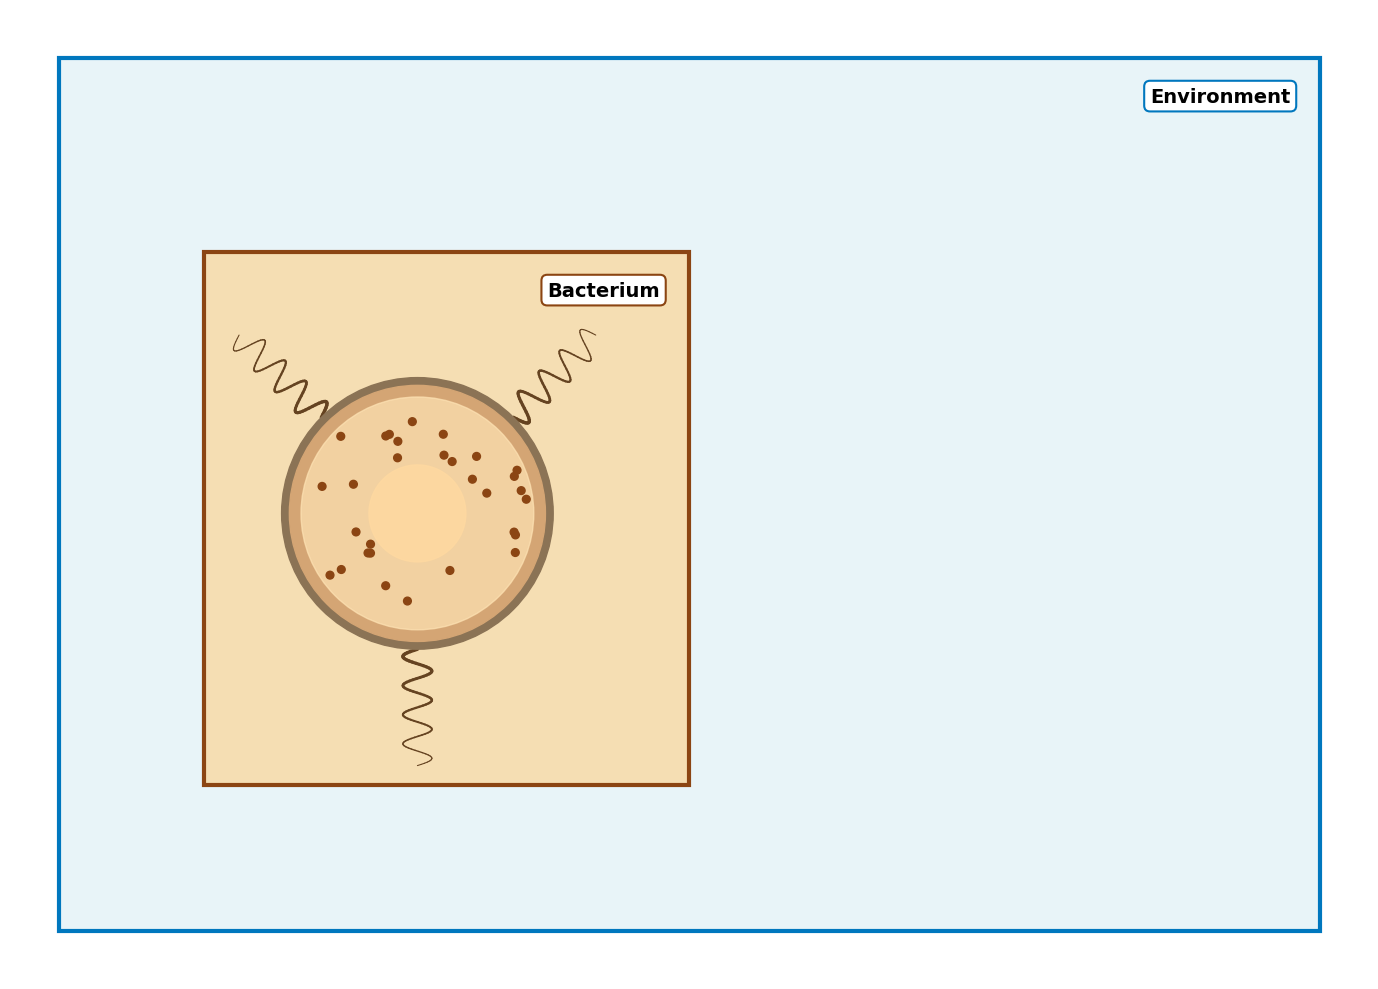

In [9]:
# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Set up the coordinate system
ax.set_xlim(0, 14)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.axis('off')

# STEP 1: Create large rectangular Environment box
# Box dimensions: width > height
env_box_x = 0.5
env_box_y = 0.5
env_box_width = 13
env_box_height = 9

environment_box = patches.Rectangle((env_box_x, env_box_y), env_box_width, env_box_height,
                                     linewidth=3, edgecolor='#0077BE', 
                                     facecolor='#E8F4F8', zorder=1)
ax.add_patch(environment_box)

# Add "Environment" label in top-right of the box
ax.text(env_box_x + env_box_width - 0.3, env_box_y + env_box_height - 0.3, 
        'Environment', fontsize=14, fontweight='bold',
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#0077BE', linewidth=1.5))

# STEP 2: Create smaller rectangular Bacterium box inside Environment box
# Box dimensions: width > height, positioned inside environment box
bact_box_x = 2
bact_box_y = 2.0
bact_box_width = 5
bact_box_height = 5.5

bacterium_box = patches.Rectangle((bact_box_x, bact_box_y), bact_box_width, bact_box_height,
                                   linewidth=3, edgecolor='#8B4513', 
                                   facecolor='#F5DEB3', zorder=2)
ax.add_patch(bacterium_box)

# Add "Bacterium" label in top-right of the box
ax.text(bact_box_x + bact_box_width - 0.3, bact_box_y + bact_box_height - 0.3, 
        'Bacterium', fontsize=14, fontweight='bold',
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='#8B4513', linewidth=1.5))

# STEP 3: Draw the bacterium illustration in the bottom-left of the brown box
# Position the bacterium center in bottom-left area of bacterium box
bacterium_center_x = bact_box_x + 2.2  # Bottom-left positioning
bacterium_center_y = bact_box_y + 2.8
center = (bacterium_center_x, bacterium_center_y)

# Define bacterium parameters (scaled appropriately)
cytoplasm_radius = 1.2  # Inner radius (cytoplasm)
membrane_radius = 1.32  # Cell membrane
cell_wall_radius = 1.4  # Cell wall (outer boundary)

# Draw the cell wall (outer layer)
cell_wall = Circle(center, cell_wall_radius, color='#8B7355', zorder=3)
ax.add_patch(cell_wall)

# 3. Draw the cell membrane
cell_membrane = Circle(center, membrane_radius, color='#D4A574', zorder=4)
ax.add_patch(cell_membrane)

# 4. Draw the cytoplasm (interior)
cytoplasm = Circle(center, cytoplasm_radius, color='#FFE4B5', alpha=0.7, zorder=5)
ax.add_patch(cytoplasm)

# 5. Add internal structures (ribosomes, nucleoid region)
# Nucleoid region (DNA area) - shown as irregular lighter region
nucleoid = Circle(center, 0.5, color='#FFD9A0', alpha=0.8, zorder=6)
ax.add_patch(nucleoid)

# Ribosomes (small dots scattered in cytoplasm)
np.random.seed(42)
n_ribosomes = 30
for _ in range(n_ribosomes):
    angle = np.random.uniform(0, 2*np.pi)
    r = np.random.uniform(0.55, 1.15)  # Between nucleoid and membrane
    x = bacterium_center_x + r * np.cos(angle)
    y = bacterium_center_y + r * np.sin(angle)
    ribosome = Circle((x, y), 0.04, color='#8B4513', zorder=7)
    ax.add_patch(ribosome)

# 6. Draw flagella (whip-like structures)
flagella_angles = [45, 135, -90]  # Degrees
flagella_colors = ['#654321', '#654321', '#654321']

for i, angle_deg in enumerate(flagella_angles):
    angle_rad = np.radians(angle_deg)
    
    # Starting point at cell wall
    start_x = bacterium_center_x + cell_wall_radius * np.cos(angle_rad)
    start_y = bacterium_center_y + cell_wall_radius * np.sin(angle_rad)
    
    # Create wavy flagellum using a parametric curve
    t = np.linspace(0, 1, 100)
    length = 1.2
    
    # Parametric equations for wavy flagellum
    flagellum_x = start_x + length * t * np.cos(angle_rad) + 0.15 * np.sin(8 * np.pi * t) * np.sin(angle_rad)
    flagellum_y = start_y + length * t * np.sin(angle_rad) - 0.15 * np.sin(8 * np.pi * t) * np.cos(angle_rad)
    
    # Gradually decrease line width to taper the flagellum
    for j in range(len(t)-1):
        width = 2.5 * (1 - t[j] * 0.7)  # Tapers from 2.5 to ~0.75
        ax.plot(flagellum_x[j:j+2], flagellum_y[j:j+2], 
                color=flagella_colors[i], linewidth=width, zorder=2, solid_capstyle='round')

# 7. Add "Boundary" label pointing to the cell wall/membrane interface
boundary_angle = np.radians(200)
boundary_x = bacterium_center_x + cell_wall_radius * np.cos(boundary_angle)
boundary_y = bacterium_center_y + cell_wall_radius * np.sin(boundary_angle)

plt.tight_layout()
plt.show()

## Explanation of the visualization:

**Structure layers (from outside to inside):**
1. **Environment** (light blue background): The surrounding medium
2. **Cell Wall** (brown outer ring): Rigid protective layer
3. **Cell Membrane** (tan ring): Semi-permeable membrane controlling substance flow
4. **Cytoplasm** (light yellow): Interior fluid containing cellular components
5. **Nucleoid region** (darker yellow center): Area containing bacterial DNA
6. **Ribosomes** (small brown dots): Protein synthesis machinery
7. **Flagella** (wavy brown filaments): Locomotion structures

**Key labels:**
- **Bacterium**: Points to the entire bacterial cell
- **Boundary**: Indicates the cell wall and membrane interface
- **Environment**: Shows the surrounding medium

## Optional: Save the figure
Uncomment and run the cell below to save the visualization as a high-resolution image.

In [10]:
fig.savefig('outputs/bacterium_visualization.png', dpi=300, bbox_inches='tight', facecolor='white')
print("Figure saved as 'bacterium_visualization.png'")

Figure saved as 'bacterium_visualization.png'
